In [ ]:
import pandas as pd

df = pd.read_csv('/sales_data_with_discounts.csv')
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

mean = df[numerical_cols].mean()
median = df[numerical_cols].median()
mode = df[numerical_cols].mode().iloc[0]
std_dev = df[numerical_cols].std()

# statistics
print(f"Mean:\n{mean}")
print(f"Median:\n{median}")
print(f"Mode:\n{mode}")
print(f"Standard Deviation:\n{std_dev}")


Mean:
Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
Median:
Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64
Mode:
Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64
Standard Deviation:
Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


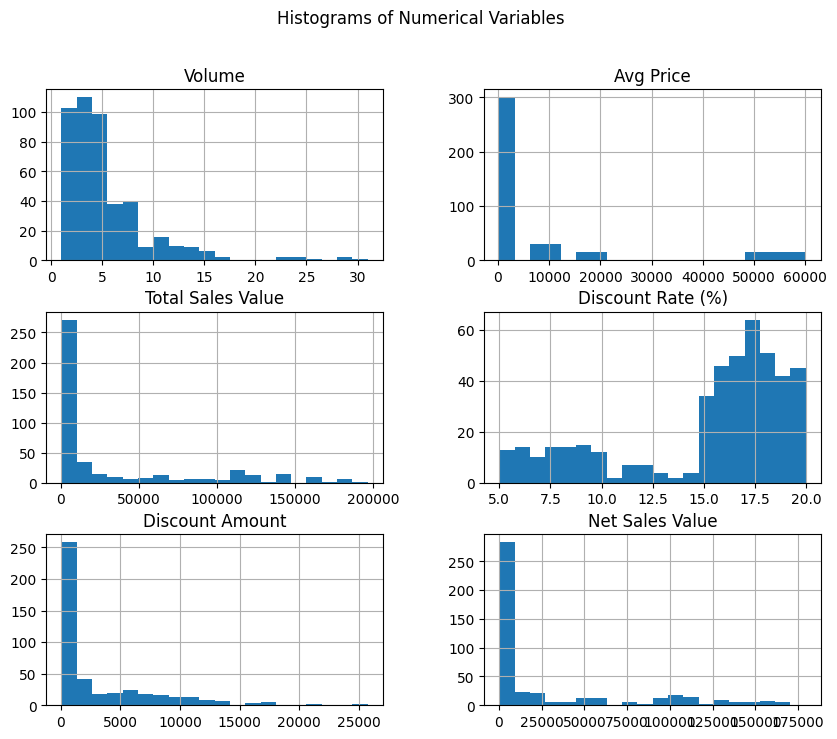

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms
df[numerical_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Numerical Variables')
plt.show()


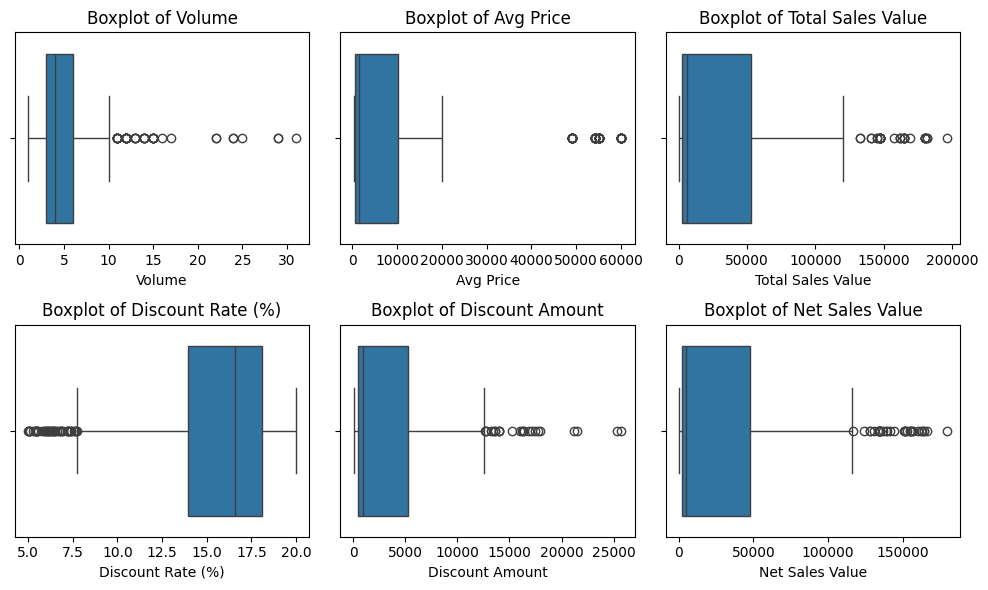

In [ ]:
import seaborn as sns

# boxplots
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols)//2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


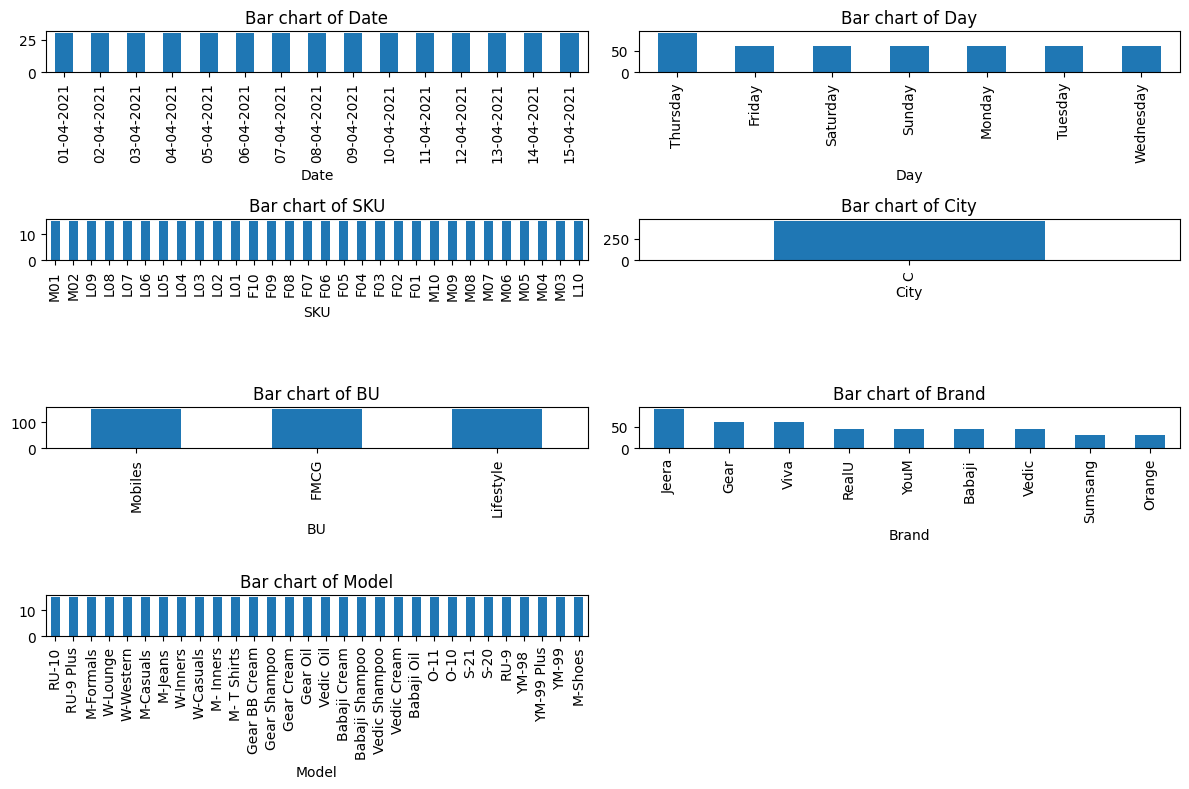

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
num_rows = (num_cols + 1) // 2

# Plot bar charts
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, 2, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar chart of {col}')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler object
scaler = StandardScaler()

df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Before Standardization:")
print(df[numerical_cols].head())

print("After Standardization:")
print(df_standardized[numerical_cols].head())


Before Standardization:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
After Standardization:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146      

In [ ]:
# Convert categorical columns into dummy variables
df_dummies = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine the dummy variables with the original dataset
df_processed = pd.concat([df.drop(columns=categorical_cols), df_dummies], axis=1)

# Display a portion of the transformed dataset
print(df_processed.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...